# Assignment 5 DAL

## Utkarsh Pathak (DA24S011)

## Task 1
### 1. Introduction
This code evaluates four machine learning models on a classification task using 5-fold cross-validation:
- **Decision Tree (Categorical)**
- **Decision Tree (One-Hot Encoded)**
- **Logistic Regression (L1 Regularization)**
- **k-Nearest Neighbors (k-NN)**

The models are assessed using **Accuracy** and **Precision**.

---

### 2. Data Preprocessing
- **One-Hot Encoding**: Applied for models needing numerical input (Logistic Regression, Decision Tree One-Hot).
- **Label Encoding**: Used for the Decision Tree with categorical features.
- **StratifiedKFold**: Ensures balanced splits of the data.

---

### 3. Model Training and Hyperparameter Tuning
- **Decision Tree (Categorical)**: Trained on label-encoded features.
- **Decision Tree (One-Hot Encoded)**: Trained on one-hot encoded features.
- **Logistic Regression (L1 Regularization)**: Grid search to optimize `C`.
- **k-NN**: Grid search for the best number of neighbors (`n_neighbors`).

---

### 4. Evaluation Metrics
- **Accuracy**: Proportion of correct predictions.
- **Precision**: Weighted precision score accounting for class imbalances.
Both metrics are averaged across the 5 folds.

---

### 5. Visualization
A bar plot compares the models based on Accuracy and Precision, with error bars representing standard deviation.

- **Accuracy**: Sky blue bars.
- **Precision**: Light green bars.
- **Error Bars**: Represent standard deviations.
- **Data Labels**: Display actual accuracy and precision values.

---

### 7. Conclusion
This analysis compares four models using cross-validation. The results are visualized, providing a clear comparison of their performance in terms of Accuracy and Precision.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metri

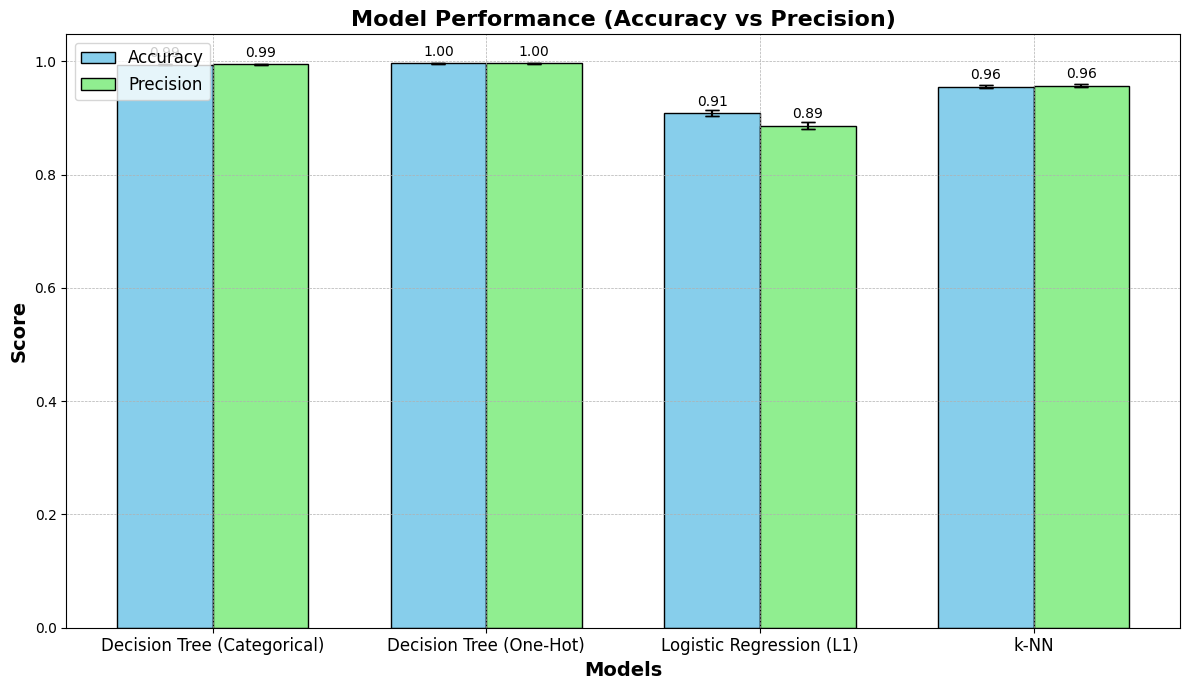

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the Nursery dataset
nursery = fetch_ucirepo(id=76)
X = nursery.data.features
y = nursery.data.targets

# Encode the target labels (if needed)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encoding for categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy and precision for each model
accuracy_dt, precision_dt = [], []
accuracy_dt_onehot, precision_dt_onehot = [], []
accuracy_logreg, precision_logreg = [], []
accuracy_knn = []
precision_knn = []


# Perform 5-fold cross-validation
for train_index, test_index in skf.split(X, y_encoded):
    # Split into train and test
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y_encoded[train_index], y_encoded[test_index]

    # One-hot encoding for Decision Tree (One-Hot) and Logistic Regression
    X_train_fold_onehot = pd.get_dummies(X_train_fold)
    X_test_fold_onehot = pd.get_dummies(X_test_fold)

    # Ensure the test set has the same structure as the training set
    X_test_fold_onehot = X_test_fold_onehot.reindex(columns=X_train_fold_onehot.columns, fill_value=0)

    # Label encoding for the Decision Tree model with categorical features
    X_train_fold_label = X_train_fold.copy()
    X_test_fold_label = X_test_fold.copy()

    # Apply LabelEncoder to each categorical column
    label_encoders = {}
    for column in X_train_fold.columns:
        le = LabelEncoder()
        X_train_fold_label[column] = le.fit_transform(X_train_fold[column])
        X_test_fold_label[column] = le.transform(X_test_fold[column])
        label_encoders[column] = le  # Save the encoders if needed later

    # 1. Decision Tree (Categorical Features)
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_fold_label, y_train_fold)
    y_pred_dt = dt_model.predict(X_test_fold_label)
    accuracy_dt.append(accuracy_score(y_test_fold, y_pred_dt))
    precision_dt.append(precision_score(y_test_fold, y_pred_dt, average='weighted'))

    # 2. Decision Tree (One-Hot Encoded)
    dt_onehot_model = DecisionTreeClassifier(random_state=42)
    dt_onehot_model.fit(X_train_fold_onehot, y_train_fold)
    y_pred_dt_onehot = dt_onehot_model.predict(X_test_fold_onehot)
    accuracy_dt_onehot.append(accuracy_score(y_test_fold, y_pred_dt_onehot))
    precision_dt_onehot.append(precision_score(y_test_fold, y_pred_dt_onehot, average='weighted'))

    # 3. Logistic Regression with L1 Regularization
    logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    grid_logreg_l1 = GridSearchCV(logreg_l1, {'C': [0.01, 0.1, 1, 10, 100]}, cv=3, scoring='accuracy')
    grid_logreg_l1.fit(X_train_fold_onehot, y_train_fold)
    y_pred_logreg = grid_logreg_l1.predict(X_test_fold_onehot)
    accuracy_logreg.append(accuracy_score(y_test_fold, y_pred_logreg))
    precision_logreg.append(precision_score(y_test_fold, y_pred_logreg, average='weighted'))

    # 4. k-Nearest Neighbors
    knn_model = KNeighborsClassifier()
    grid_knn = GridSearchCV(knn_model, {'n_neighbors': [3, 5, 7, 9]}, cv=3, scoring='accuracy')
    grid_knn.fit(X_train_fold_onehot, y_train_fold)
    y_pred_knn = grid_knn.predict(X_test_fold_onehot)
    accuracy_knn.append(accuracy_score(y_test_fold, y_pred_knn))
    precision_knn.append(precision_score(y_test_fold, y_pred_knn, average='weighted'))

# Compute mean and variance for each model's accuracy and precision
results = {
    'Model': ['Decision Tree (Categorical)', 'Decision Tree (One-Hot)', 'Logistic Regression (L1)', 'k-NN'],
    'Accuracy Mean': [np.mean(accuracy_dt), np.mean(accuracy_dt_onehot), np.mean(accuracy_logreg), np.mean(accuracy_knn)],
    'Accuracy Std': [np.std(accuracy_dt), np.std(accuracy_dt_onehot), np.std(accuracy_logreg), np.std(accuracy_knn)],
    'Precision Mean': [np.mean(precision_dt), np.mean(precision_dt_onehot), np.mean(precision_logreg), np.mean(precision_knn)],
    'Precision Std': [np.std(precision_dt), np.std(precision_dt_onehot), np.std(precision_logreg), np.std(precision_knn)]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results)
# Plotting Accuracy and Precision with error bars and additional details
x_labels = results_df['Model']
accuracy_mean = results_df['Accuracy Mean']
precision_mean = results_df['Precision Mean']
accuracy_std = results_df['Accuracy Std']
precision_std = results_df['Precision Std']

x = np.arange(len(x_labels))  # the label locations
width = 0.35  # the width of the bars

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Plot Accuracy bars
rects1 = ax.bar(x - width/2, accuracy_mean, width, yerr=accuracy_std, label='Accuracy',
                capsize=5, color='skyblue', edgecolor='black', linewidth=1)

# Plot Precision bars
rects2 = ax.bar(x + width/2, precision_mean, width, yerr=precision_std, label='Precision',
                capsize=5, color='lightgreen', edgecolor='black', linewidth=1)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding detailed titles and axis labels
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Model Performance (Accuracy vs Precision)', fontsize=16, fontweight='bold')

# Add x-ticks with model names
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=12)

# Add a legend
ax.legend(loc='upper left', fontsize=12)

# Add text labels above the bars to show exact accuracy and precision values
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',  # Format to 2 decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # Vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

# Adding error bars with caps
ax.errorbar(x - width/2, accuracy_mean, yerr=accuracy_std, fmt='none', ecolor='black', capsize=5)
ax.errorbar(x + width/2, precision_mean, yerr=precision_std, fmt='none', ecolor='black', capsize=5)

# Display the plot
fig.tight_layout()
plt.show()


## Task 2
### 1. Introduction
This code compares the **bipolar sigmoid** and **tanh** activation functions, analyzing their behavior for different scaling factors `a`. It also evaluates the **linearity range** of the bipolar sigmoid for various values of `a`.

---

### 2. Function Definitions
- **Unipolar Sigmoid**: \( f(x) = \frac{1}{1 + e^{-x}} \)
- **Bipolar Sigmoid**: \( f(x) = 2 \times \text{Unipolar Sigmoid}(x) - 1 \)
- **Tanh**: \( \tanh(x) \)

The code generalizes both the bipolar sigmoid and tanh functions to parameterized versions:
- **Bipolar Sigmoid (with parameter a)**: \( f(ax) \)
- **Tanh (with parameter a)**: \( \tanh(ax) \)

---

### 3. Plotting Bipolar Sigmoid and Tanh
The behavior of both **bipolar sigmoid** and **tanh** is visualized for a range of scaling factors `a`:
- **a-values**: `[-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]`
- **X-Range**: \( x \in [-10, 10] \)
- The plot shows how both functions change as the scaling factor `a` varies.

#### Key Insights:
- **Negative a-values**: Invert the shape of both functions.
- **Small positive values of a**: Stretch the curves, making the transitions smoother.
- **Large positive values of a**: Compress the curves, leading to sharper transitions.

---

### 4. Linearity Range of Bipolar Sigmoid
The **derivative** of the bipolar sigmoid is used to estimate its linearity:
- **Derivative formula**: \( f'(x) = 2a \times \text{Unipolar Sigmoid}(ax) \times (1 - \text{Unipolar Sigmoid}(ax)) \)
- The **linear range** is defined where the derivative is approximately constant (0.9 of its maximum).

For each value of `a`, the code identifies the **x-range** where the bipolar sigmoid behaves linearly.

---


### 5. Conclusion
This analysis provides a clear comparison between the **bipolar sigmoid** and **tanh** functions across different values of `a`. It also identifies the regions where the bipolar sigmoid exhibits linear behavior.

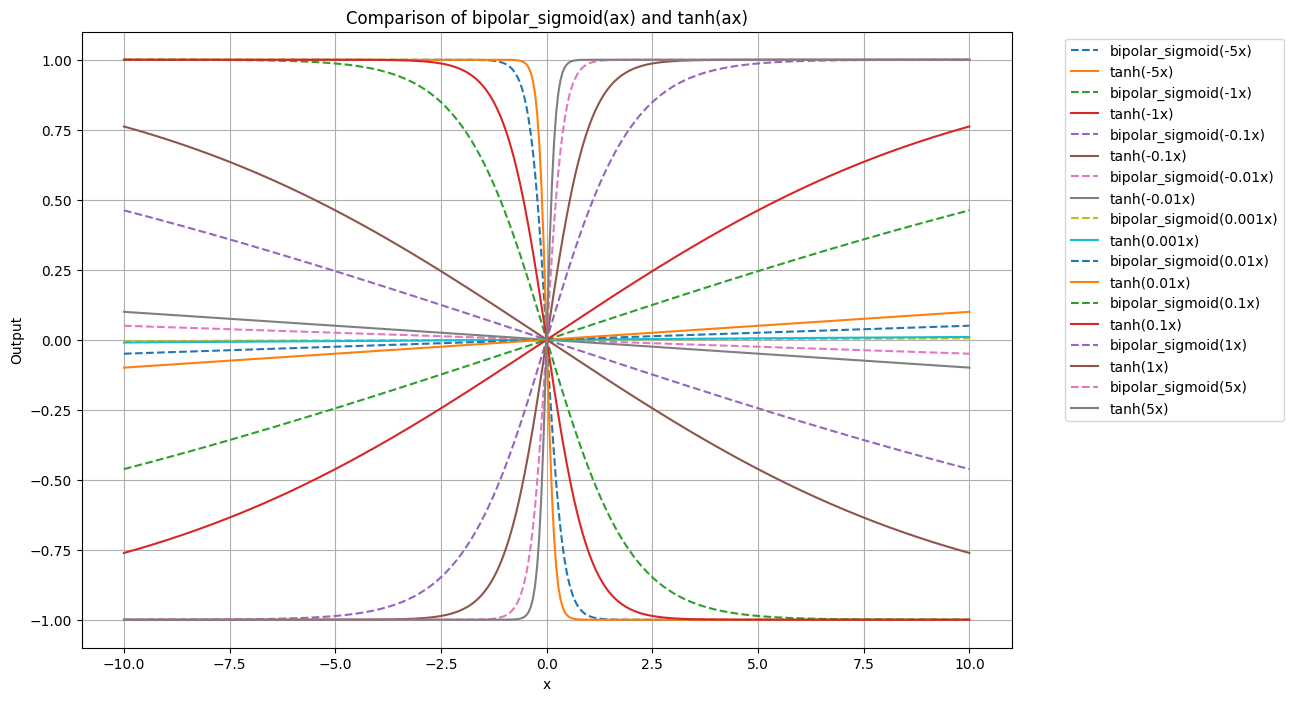

Linear range for a = -5: None
Linear range for a = -1: None
Linear range for a = -0.1: None
Linear range for a = -0.01: None
Linear range for a = 0.001: (-10.0, 10.0)
Linear range for a = 0.01: (-10.0, 10.0)
Linear range for a = 0.1: (-6.541353383458647, 6.541353383458645)
Linear range for a = 1: (-0.6265664160401005, 0.6265664160400988)
Linear range for a = 5: (-0.12531328320802082, 0.12531328320801904)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define unipolar and bipolar sigmoid functions
def unipolar_sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return 2 * unipolar_sigmoid(x) - 1

# 2. Compare bipolar_sigmoid(x) with tanh(x)
def tanh(x):
    return np.tanh(x)

# 3. Parameterize as bipolar_sigmoid(ax) and tanh(ax)
def bipolar_sigmoid_param(x, a):
    return bipolar_sigmoid(a * x)

def tanh_param(x, a):
    return np.tanh(a * x)

# Values of 'a' to try
a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]

# Generate x values for plotting
x = np.linspace(-10, 10, 400)

# Plot the shapes of bipolar_sigmoid(ax) and tanh(ax) for different values of 'a'
plt.figure(figsize=(12, 8))

for a in a_values:
    y_bipolar_sigmoid = bipolar_sigmoid_param(x, a)
    y_tanh = tanh_param(x, a)

    # Plot bipolar_sigmoid(ax)
    plt.plot(x, y_bipolar_sigmoid, label=f'bipolar_sigmoid({a}x)', linestyle='--')

    # Plot tanh(ax)
    plt.plot(x, y_tanh, label=f'tanh({a}x)', linestyle='-')

plt.title('Comparison of bipolar_sigmoid(ax) and tanh(ax)')
plt.xlabel('x')
plt.ylabel('Output')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 4. Evaluate linearity range of bipolar_sigmoid(ax) for each 'a'
def bipolar_sigmoid_derivative(x, a):
    # Derivative of bipolar_sigmoid(ax)
    return 2 * a * unipolar_sigmoid(a * x) * (1 - unipolar_sigmoid(a * x))

# Compute linearity range by checking where the derivative is roughly constant
linear_ranges = {}

for a in a_values:
    derivative = bipolar_sigmoid_derivative(x, a)

    # Find range where derivative is close to constant (threshold for "linear" region)
    # We'll define "linear" as where the derivative is approximately 0.9 of its maximum
    max_deriv = np.max(derivative)
    linear_region = np.abs(derivative - max_deriv) < 0.1 * max_deriv

    # The linear range will be the range of x values where this condition holds
    x_linear = x[linear_region]

    if len(x_linear) > 0:
        linear_range = (x_linear[0], x_linear[-1])
    else:
        linear_range = None  # No significant linear range

    linear_ranges[a] = linear_range

# Display the linear range for each 'a'
for a, linear_range in linear_ranges.items():
    print(f"Linear range for a = {a}: {linear_range}")
